<a href="https://colab.research.google.com/github/ZhyShe/18ma573ZhiyuanShe/blob/master/src/hw2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ex.

Suppose that we wish to approximate the first derivative $u'(x)$ of a very smooth function with an error of only $O(h)^4$, where $h$ is the step size. Which difference approximation could we use?

In [0]:
import numpy as np
import matplotlib.pyplot as plt

def ffd(f, x, h):
  return (f(x+h)-f(x))/h
def bfd(f, x, h):
  return (f(x)-f(x-h))/h
def cfd(f, x, h):
  return (ffd(f, x, h)+bfd(f, x, h))/2
def Richardson(r, f, x, h):#here r satisfies 1-r^n $\neq$0, where n is the convergence order of cfd 
  return (cfd(f, x, r*h)-(r**2)*cfd(f, x, h))/(1-r**2)
  

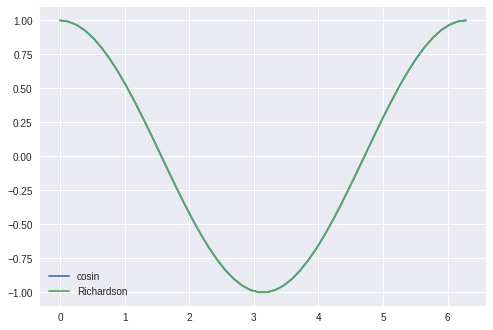

In [7]:
xs=np.linspace(0,2*np.pi)
plt.plot(xs,np.cos(xs), label='cosin')
plt.plot(xs,Richardson(0.5, np.sin, xs, .5), label = 'Richardson')
plt.legend()
plt.show()

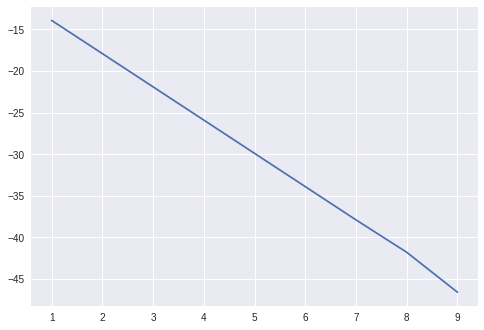

In [9]:
examined_point=np.pi/3
examined_value=np.cos(examined_point)
nn=np.arange(1,10)
hh=1/np.power(2,nn)
err=Richardson(0.5, np.sin, examined_point, hh)-examined_value
yy=np.log2(np.abs(err))
plt.plot(nn,yy)
plt.show()

In [10]:
import scipy.stats as ss
out = ss.linregress(nn,yy)
print('----->>>the convergence order is ' + str(-out[0]))

----->>>the convergence order is 4.040665587116861


__Proof__, We know $I(h)=\frac{\delta_hf(x)+\delta_{-h}f(x)}{2}$ converges to $f'(x)$ with rate 2. That is 
\begin{align}
(1)\quad\quad f'(x)-I(h)=-\frac{f^{(3)}(x)}{3\mathop{!}}h^2-\frac{f^{(5)}(x)}{5\mathop{!}}h^4+o(h^5)
\end{align}
Therefore, let $r$ satisfy $1-r^2\neq0$. We have
$$
(2)\quad\quad f'(x)-I(rh)=-\frac{f^{(3)}(x)}{3\mathop{!}}(rh)^2-\frac{f^{(5)}(x)}{5\mathop{!}}(rh)^4+o(h^5)
$$
Both sides of (1) times $r^2$, we get
$$
(3)\quad\quad r^2f'(x)-r^2I(h)=-\frac{f^{(3)}(x)}{3\mathop{!}}(rh)^2-\frac{f^{(5)}(x)}{5\mathop{!}}r^2h^4+o(h^5)
$$
Let $(2)-(3)$, we get 
$$
(4)\quad\quad(1-r^2)f'(x)-\big(I(rh)-r^2I(h)\big)=-\frac{f^{(5)}(x)}{5\mathop{!}}(r^4-r^2)h^4+o(h^5)
$$
divide both sides of  $(4)$ by $1-r^2$, we have
$$
f'(x)-\frac{I(rh)-r^2I(h)}{1-r^2}=\frac{f^{(5)}(x)}{5\mathop{!}}r^2h^4+o(h^5)
$$
Let $I_1(h):=\frac{I(rh)-r^2I(h)}{1-r^2}$, we use $I_{1}(h)$ to approximate $f'(x)$ with only $o(h^4)$ error.